**Notebook 3: Aplicación de modelos NLP**

Objetivo: Extraer atributos desde campos de texto de acciones PME

# Inicialización

In [6]:
# descargar language model: python -m spacy download es_core_news_sm 
import spacy
nlp = spacy.load("es_core_news_sm")
import pandas as pd
import os 
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer
from herramientas_pme import *

In [3]:
# Directorios [cambiar a directorio propios]
pme_path = r'C:\Users\JoaquinFarina\Dropbox\Team NLP\Data\Planes de Mejoramiento Educativo\InformeFinal'
# establecer directorio de trabajo
os.chdir(pme_path)

In [4]:
# Diccionario para guardar tablas generadas
tablas_dict = {}

In [5]:
# cargar bbdd
df_planificacion_implementacion_total = pd.read_csv('Datos\Intermedios\df_planificacion_implementacion_total_2018_2022_avance1.csv', 
                                                    low_memory=False)

# Cantidad de frases en Descripción del Plan


In [7]:
# Segmentación en frases 
df_planificacion_implementacion_total['n_frases_descripcion_plan'] = df_planificacion_implementacion_total['descripción_del_plan'].apply(n_frases)
df_planificacion_implementacion_total['n_palabras_descripcion_plan'] = df_planificacion_implementacion_total['descripción_del_plan'].apply(n_palabras)

In [8]:
for a in agno_intervalo:
    data_a = df_planificacion_implementacion_total[df_planificacion_implementacion_total.agno == a]  
    if a == agno_inicial:
        df_resumen_n_frases = data_a['n_frases_descripcion_plan'].value_counts(dropna=False)/len(data_a)
    else:
        s2 = data_a['n_frases_descripcion_plan'].value_counts(dropna=False)/len(data_a)
        df_resumen_n_frases = pd.concat([df_resumen_n_frases,s2], axis = 1)

df_resumen_n_frases.columns = agno_intervalo

In [9]:
df_resumen_n_frases = np.round(100*df_resumen_n_frases.iloc[:4],2)
tablas_dict['numero_de_frases'] = df_resumen_n_frases
df_resumen_n_frases

,2018,2019,2020,2021,2022
1.0,81.51,80.71,79.37,78.59,79.86
2.0,14.37,14.99,16.15,16.69,15.93
3.0,2.90,3.08,3.25,3.43,3.15
4.0,0.70,0.71,0.71,0.75,0.61


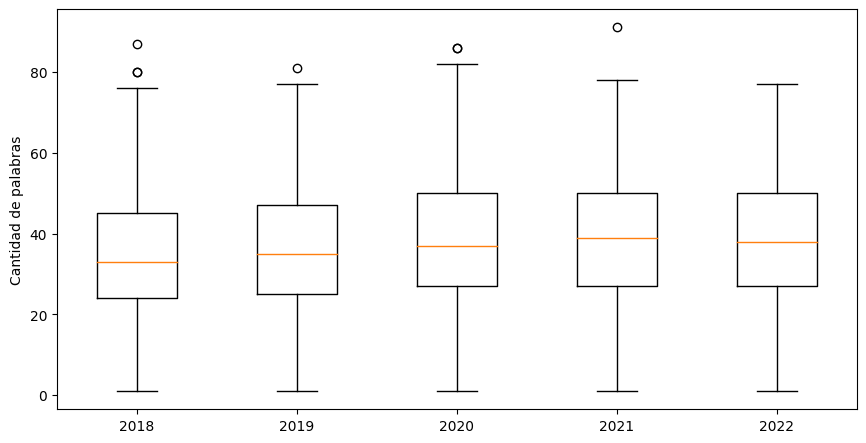

In [10]:
data_list = []
for a in agno_intervalo:
    data_list+= [df_planificacion_implementacion_total[df_planificacion_implementacion_total.agno==a].n_palabras_descripcion_plan.dropna()]
 

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data_list)

ax.set_ylabel('Cantidad de palabras')
ax.set_xticklabels(list(agno_intervalo))
# show plot
plt.savefig(r'Figuras\F3_cantidad_palabras.png',dpi=200,bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()

# Número único de palabras

In [11]:
df_planificacion_implementacion_total['n_palabras_unicas_descripcion_plan'] = df_planificacion_implementacion_total['descripción_del_plan'].apply(n_palabras_unicas)

In [12]:
df_n_unique_words = np.round(df_planificacion_implementacion_total[['agno', 
                                                     'n_palabras_unicas_descripcion_plan']].groupby(['agno']).mean().T,2)
tablas_dict['n_palabras_unicas'] = df_n_unique_words
df_n_unique_words

agno,2018,2019,2020,2021,2022
n_palabras_unicas_descripcion_plan,28.0,29.01,30.24,30.83,30.45


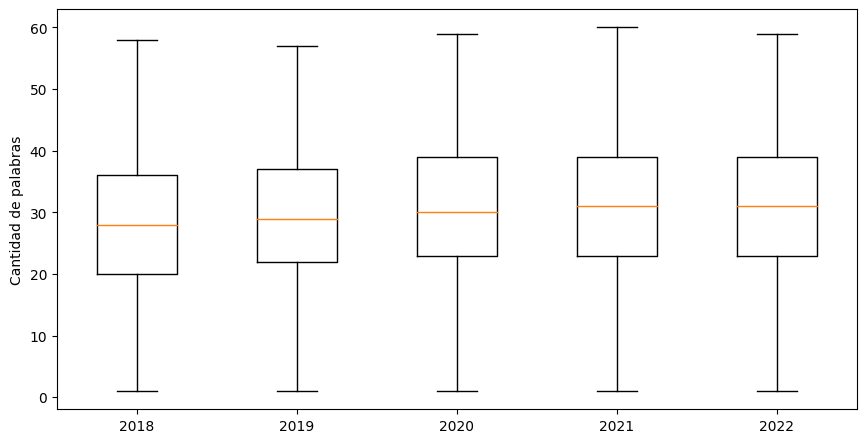

In [14]:
data_list = []
for a in agno_intervalo:
    data_list+= [df_planificacion_implementacion_total[df_planificacion_implementacion_total.agno==a].n_palabras_unicas_descripcion_plan.dropna()]
 

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data_list)

ax.set_ylabel('Cantidad de palabras')
ax.set_xticklabels(list(agno_intervalo))
# show plot
plt.savefig(r'Figuras\F4_cantidad_palabras_unicas.png',dpi=200,bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()

# Cantidad de caracteres

In [15]:
df_planificacion_implementacion_total['n_caracteres_descripcion_plan'] = df_planificacion_implementacion_total['descripción_del_plan'].apply(n_caracteres)

In [16]:
df_n_caracteres = np.round(df_planificacion_implementacion_total[['agno', 'n_caracteres_descripcion_plan']].groupby(['agno']).mean().T,2)
tablas_dict['n_caracteres'] = df_n_caracteres
df_n_caracteres

agno,2018,2019,2020,2021,2022
n_caracteres_descripcion_plan,235.13,246.01,257.66,264.52,262.35


# Frecuencia de palabras

In [17]:
descripcion_fill_string = df_planificacion_implementacion_total['descripción_del_plan'].to_string()
token=re.findall('\w+', descripcion_fill_string)
sw=nltk.corpus.stopwords.words('spanish')

In [18]:
words=[]
for word in token:
    words.append(word.lower())
# get the list without stop words
words_ne=[]
for word in words:
    if (word not in sw) and (len(word)>2):
        words_ne.append(word)

In [19]:
# corrección específica
words_ne = list(map(lambda x: x.replace('realizara', 'realizar'), words_ne))
words_ne = list(map(lambda x: x.replace('realizará', 'realizar'), words_ne))
words_ne = list(map(lambda x: x.replace('realizarán', 'realizar'), words_ne))
words_ne = list(map(lambda x: x.replace('realiza', 'realizar'), words_ne))

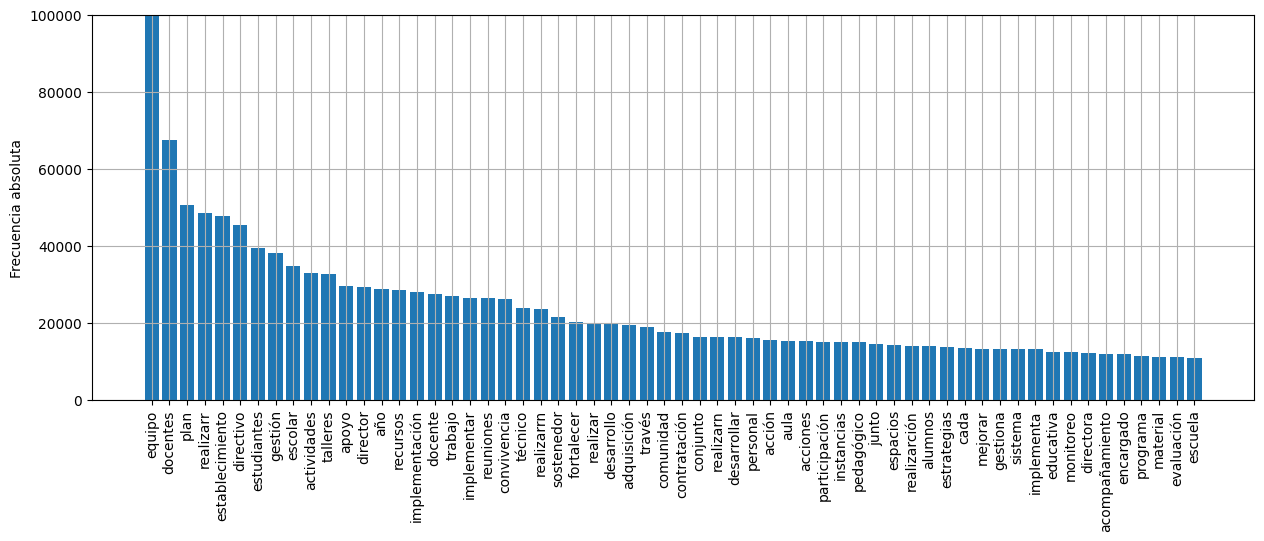

In [20]:
fig,ax = plt.subplots(figsize=(15,5))
nlp_words=nltk.FreqDist(words_ne)
df = pd.DataFrame(nlp_words.most_common(60), columns = ['word','f'])
plt.bar(np.arange(60),df.f)
ax.set_xticks(np.arange(60))
ax.set_xticklabels(df.word, rotation = 90)
ax.set_ylim([0,100000])
plt.grid(True)
plt.ylabel('Frecuencia absoluta')
plt.savefig(r'Figuras\F5_frecuencia_palabras.png',dpi=200,bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()

# Part-of-Speech Tagging

In [21]:
# toma tiempo! (2.5 horas)

# Descomentar para volver a ejecutar
df_n_ADJ_NOUN_VERB_ADV = df_planificacion_implementacion_total.apply(lambda row: n_ADJ_NOUN_VERB_ADV(row['descripción_del_plan']), axis='columns', result_type='expand')
df_n_ADJ_NOUN_VERB_ADV.columns = ['n_adjetivos','n_sustantivos', 'n_verbos', 'n_adverbios']

df_planificacion_implementacion_total = pd.concat([df_planificacion_implementacion_total, df_n_ADJ_NOUN_VERB_ADV],axis=1)
df_planificacion_implementacion_total.to_csv(r'Datos\Intermedios\df_planificacion_implementacion_total_2018_2022_avance1_POS.csv', index=False)

# df_planificacion_total_pos = pd.read_csv(r'Datos\Intermedios\df_planificacion_implementacion_total_2018_2022_avance1_POS.csv', low_memory=False)

In [22]:
j = 0
for col in ['n_adjetivos','n_sustantivos', 'n_verbos', 'n_adverbios']:
    if j == 0:
        df_POS = df_planificacion_implementacion_total[[col,'agno']].groupby(['agno']).mean().T
    else:
        df_POS = pd.concat([df_POS,df_planificacion_implementacion_total[[col,'agno']].groupby(['agno']).mean().T],axis=0)
    j+=1

In [23]:
df_POS = np.round(df_POS,2)
tablas_dict['resumen_POS'] =  df_POS
df_POS

agno,2018,2019,2020,2021,2022
n_adjetivos,3.89,4.10,4.43,4.62,4.50
n_sustantivos,11.21,11.73,12.22,12.50,12.41
n_verbos,2.89,2.99,3.08,3.13,3.10
n_adverbios,0.33,0.34,0.33,0.34,0.34


# Sentiment analysis
https://pypi.org/project/sentiment-analysis-spanish/

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="es")

# TOMA 16 HORAS
# lista de descripciones
descripciones_plan = df_planificacion_implementacion_total.descripción_del_plan.dropna().unique()
# Para guardar actividades según sentimiento
list_sent_pos=[]
list_sent_neg = []
list_sent_neu = []
# Para guardar probabilidades según sentimiento 
list_prob_pos = []
list_prob_neg = []
list_prob_neu = []

j = 0
N = len(descripciones_plan)
for e in descripciones_plan:
    sent = analyzer.predict(e)
    
    pos = sent.probas['POS'] 
    neg = sent.probas['NEG'] 
    neut = sent.probas['NEU'] 
    
    list_prob_pos += [pos]
    list_prob_neg += [neg]
    list_prob_neu += [neut]

    if pos > 0.8:  
        print('POS: ', e,'\n')
        list_sent_pos += [e]

    if neg > 0.8:  
        print('NEG: ',e,'\n')
        list_sent_neg += [e]
        
    # mostrar prograso 
    if j%5000 == 0:
        print(j/N)
        
    j+=1
    
# Guardar 
df_positive = pd.DataFrame(list(zip(descripciones_plan, list_prob_pos)), 
                           columns = ['descripcion_del_plan','probalidad_positivo'])
df_positive.to_csv('Datos\Intermedios\df_sentiment_analysis_descripcion_acciones.csv', index=False)

In [24]:
# Desde carga de BBDD generada 
df_positive = pd.read_csv('Datos\Intermedios\df_sentiment_analysis_descripcion_acciones.csv',low_memory=False)
df_positive = df_positive[['Descripcion_plan_PLANIF', 'probalidad_positivo']]
df_positive.rename(columns = {'Descripcion_plan_PLANIF':'descripción_del_plan'}, inplace=True)
# tras inspección se escoge umbral 0.6
df_positive['descripcion_positiva'] = (df_positive.probalidad_positivo>=0.6).astype(int)

# consolidad
df_planificacion_implementacion_total = pd.merge(df_planificacion_implementacion_total,df_positive, how = 'left', 
                                                 on = ['descripción_del_plan'] )

In [25]:
list_pos = []
for a in range(2018,2023):
    data_a = df_planificacion_implementacion_total[df_planificacion_implementacion_total.agno == a]
    list_pos+= [[a, np.round(100*data_a.descripcion_positiva.mean(),2)]]
    
df = pd.DataFrame(list_pos,columns = ['Año','promedio positividad'])
df = df.T
tablas_dict['positividad'] = df
df

,0,1,2,3,4
Año,2018.00,2019.00,2020.00,2021.00,2022.00
promedio positividad,2.57,2.64,1.49,1.41,1.99


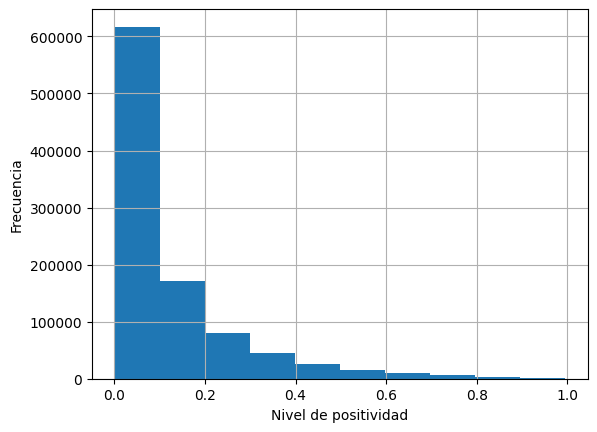

In [26]:
df_planificacion_implementacion_total.probalidad_positivo.hist()
plt.xlabel('Nivel de positividad')
plt.ylabel('Frecuencia')
plt.savefig(r'Figuras\F6_positividad.png',dpi=200,bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()

In [27]:
# Ejemplos 
lista_positive = df_planificacion_implementacion_total[df_planificacion_implementacion_total.probalidad_positivo>=0.7].descripción_del_plan.values
for x in lista_positive:
    print(x,'\n')
    
pd.DataFrame(lista_positive[:100]).to_excel('Datos\Intermedios\ejemplos_positivos.xlsx')

se favorecerá la integración de los estudiantes del programa pie a la comunidad escolar y se les apoyará para que logren un buen desarrollo personal, social y académico. 

la comunidad distingue a los estudiantes que se destacan por su desarrollo personal y social, rendimiento académico y destacado en acle, estimulando así la aspiración de altos niveles de logros. 

los asistentes de la educación participan en un taller de auto cuidado de crecimiento personal con el fin de promover y hacer significativo el tercer sello. 

desarrollar competencias y habilidades entre docentes intercambiando experiencias pedagógicas exitosas a nivel escuela y con otras unidades educativas. 

valorar los logros y esfuerzos de los estudiantes, a través de un reconocimiento ante la comunidad educativa, para potenciar su autoestima positiva. 

la celebración se centra en la familia dentro de una sociedad inclusiva, donde todos participan de un almuerzo familiar en comunidad durante el desarrollo de una velad

In [28]:
# Guardar 
df_planificacion_implementacion_total.to_csv('Datos\Intermedios\df_planificacion_implementacion_total_2018_2022_avances2.csv', index=False)

## Guardar tabla

In [29]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r'Tablas\tablas_atributos_linguisticos.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
for var in tablas_dict.keys():
    print(var)
    tablas_dict[var].to_excel(writer, sheet_name=var[:31])
# Close the Pandas Excel writer and output the Excel file.
writer.close()

numero_de_frases
n_palabras_unicas
n_caracteres
resumen_POS
positividad


In [30]:
df_planificacion_implementacion_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076359 entries, 0 to 1076358
Data columns (total 90 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   id_accion                                      1076359 non-null  int64  
 1   agno                                           1076359 non-null  int64  
 2   rbd                                            1076359 non-null  int64  
 3   region                                         1076359 non-null  object 
 4   deprov                                         1076359 non-null  object 
 5   comuna                                         1076359 non-null  object 
 6   dependencia                                    1076359 non-null  object 
 7   nombre_actividad                               1075883 non-null  object 
 8   en_planificacion_anual                         780023 non-null   float64
 9   dimensión               